In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/mappers.csv").drop(["id"], axis=1)

In [6]:

df["hs_centroid_lat"] = df[["hotspot1_lat", "hotspot2_lat", "hotspot3_lat"]].mean(axis=1)
df["hs_centroid_long"] = df[["hotspot1_long", "hotspot2_long", "hotspot3_long"]].mean(axis=1)
for hs_idx in range(1, 4):
    df[f"hs{hs_idx}_centroid_offset_lat"] = df["hs_centroid_lat"] - df[f"hotspot{hs_idx}_lat"]
    df[f"hs{hs_idx}_centroid_offset_long"] = df["hs_centroid_long"] - df[f"hotspot{hs_idx}_long"]
    df[f"hs{hs_idx}_centroid_offset_euc"] = np.sqrt(np.square(df[f"hs{hs_idx}_centroid_offset_lat"]) + np.square(df[f"hs{hs_idx}_centroid_offset_long"]))
df["hs_avg_centroid_offset_euc"] = df[["hs1_centroid_offset_euc", "hs2_centroid_offset_euc", "hs2_centroid_offset_euc"]].mean(axis=1)
df["target_centroid_offset_lat"] = df["hs_centroid_lat"] - df["latitude"]
df["target_centroid_offset_long"] = df["hs_centroid_long"] - df["longitude"]
df["target_centroid_offset_euc"] = np.sqrt(np.square(df["target_centroid_offset_lat"]) + np.square(df["target_centroid_offset_long"]))

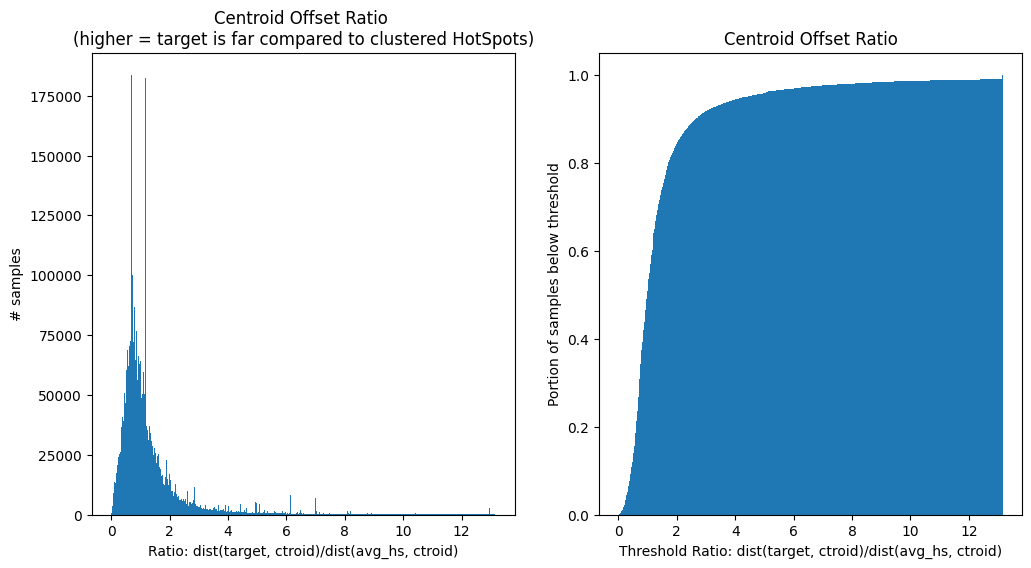

In [7]:
target_euc = df["target_centroid_offset_euc"].to_numpy()
hs_avg_euc = df["hs_avg_centroid_offset_euc"].to_numpy()
ratio = target_euc / (hs_avg_euc + 1e-16)
q = 0.99
ratio = np.where(ratio < np.quantile(ratio, q), ratio, np.quantile(ratio, q))

plt.figure(figsize=(12, 6))
ax = plt.subplot(1,2,1)
ax.hist(ratio, bins=1000)
ax.set_title("Centroid Offset Ratio \n(higher = target is far compared to clustered HotSpots)")
ax.set_ylabel("# samples")
ax.set_xlabel("Ratio: dist(target, ctroid)/dist(avg_hs, ctroid)")
ax = plt.subplot(1,2,2)
ax.hist(ratio, bins=1000, density=True, cumulative=True)
ax.set_title("Centroid Offset Ratio")
ax.set_ylabel("Portion of samples below threshold")
ax.set_xlabel("Threshold Ratio: dist(target, ctroid)/dist(avg_hs, ctroid)")
plt.show()

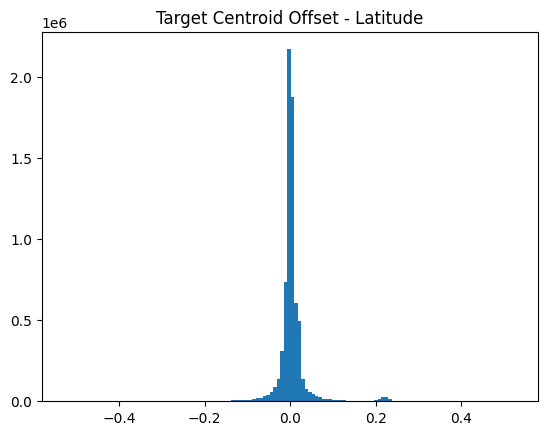

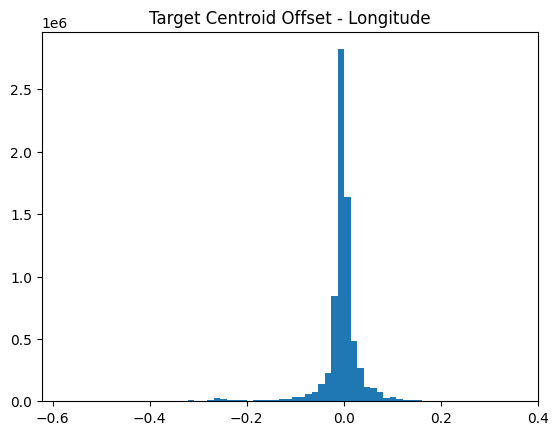

In [8]:

plt.hist(df["target_centroid_offset_lat"], bins=1000)
plt.title("Target Centroid Offset - Latitude")
plt.xlim(df["target_centroid_offset_lat"].quantile(0.001), df["target_centroid_offset_lat"].quantile(0.999))
plt.show()

plt.hist(df["target_centroid_offset_long"], bins=1000)
plt.title("Target Centroid Offset - Longitude")
plt.xlim(df["target_centroid_offset_long"].quantile(0.001), df["target_centroid_offset_long"].quantile(0.999))
plt.show()

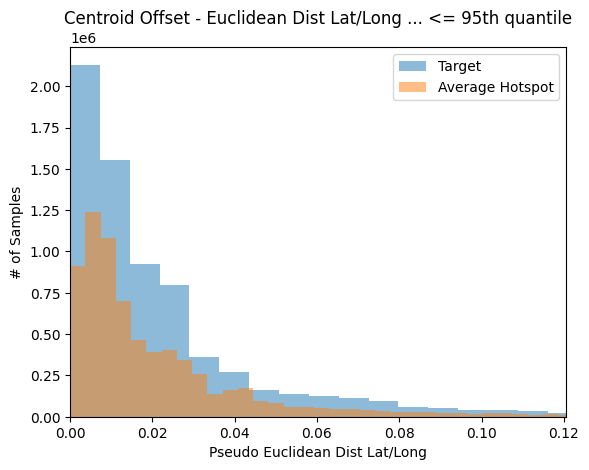

In [9]:
plt.hist(df["target_centroid_offset_euc"], bins=1000, label="Target", alpha=0.5)
plt.hist(df["hs_avg_centroid_offset_euc"], bins=1000, label="Average Hotspot", alpha=0.5)
plt.legend()
plt.title("Centroid Offset - Euclidean Dist Lat/Long ... <= 95th quantile")
plt.xlim(0, df["target_centroid_offset_euc"].quantile(0.95))
plt.xlabel("Pseudo Euclidean Dist Lat/Long")
plt.ylabel("# of Samples")
plt.show()